In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_images_path = '/content/drive/MyDrive/Deep_Learning/ProjectTask1/train_data'
val_images_path = '/content/drive/MyDrive/Deep_Learning/ProjectTask1/val_data'
train_labels_path = '/content/drive/MyDrive/Deep_Learning/ProjectTask1/train_labels.txt'
val_labels_path = '/content/drive/MyDrive/Deep_Learning/ProjectTask1/val_labels.txt'

Mounted at /content/drive


In [2]:
img_height, img_width = 224, 224
batch_size = 32
num_classes = 60

def load_labels(label_file):
    with open(label_file, 'r') as f:
        labels = f.readlines()
    labels = np.array([int(label.strip()) for label in labels]) - 1
    return to_categorical(labels, num_classes=num_classes)

train_labels = load_labels(train_labels_path)
val_labels = load_labels(val_labels_path)

def load_and_preprocess_images(image_dir):
    images = []
    for img_file in sorted(os.listdir(image_dir)):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).resize((img_width, img_height))
        img = np.array(img) / 255.0
        images.append(img)
    return np.array(images)

train_images = load_and_preprocess_images(train_images_path)
val_images = load_and_preprocess_images(val_images_path)

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

base_model.trainable = False

train_features = base_model.predict(train_images, batch_size=batch_size)
val_features = base_model.predict(val_images, batch_size=batch_size)

19/19 [==============================] - 11s 595ms/step


In [14]:
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

model = Sequential([
    Dense(512, activation='relu', input_shape=(train_features.shape[1],)),
    BatchNormalization(),
    # Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    # Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_features, train_labels,
    batch_size=batch_size,
    epochs=20,
    validation_data=(val_features, val_labels)
)

Epoch 1/20
94/94 [==============================] - 8s 67ms/step - loss: 2.4312 - accuracy: 0.4167 - val_loss: 4.9132 - val_accuracy: 0.1683
Epoch 2/20
94/94 [==============================] - 6s 64ms/step - loss: 0.6417 - accuracy: 0.8833 - val_loss: 1.4551 - val_accuracy: 0.6267
Epoch 3/20
94/94 [==============================] - 6s 65ms/step - loss: 0.1733 - accuracy: 0.9863 - val_loss: 0.9235 - val_accuracy: 0.7883
Epoch 4/20
94/94 [==============================] - 6s 63ms/step - loss: 0.0663 - accuracy: 0.9970 - val_loss: 0.8238 - val_accuracy: 0.8000
Epoch 5/20
94/94 [==============================] - 6s 62ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.7762 - val_accuracy: 0.8017
Epoch 6/20
94/94 [==============================] - 6s 64ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.7282 - val_accuracy: 0.8083
Epoch 7/20
94/94 [==============================] - 6s 63ms/step - loss: 0.0144 - accuracy: 0.9997 - val_loss: 0.7577 - val_accuracy: 0.8083
Epoch 8/20
94

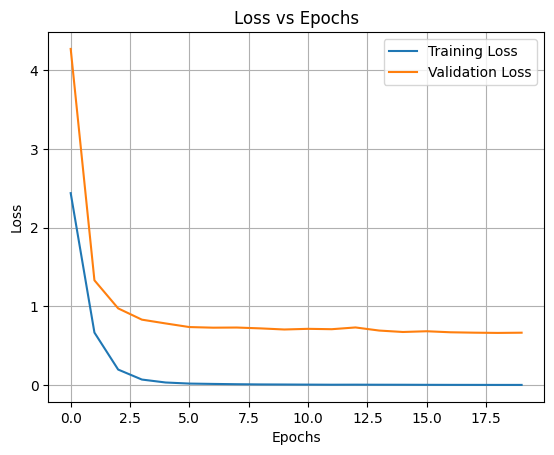

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
model.save_weights('flower_classification_dnn_weights.h5')

In [ ]:
val_loss, val_accuracy = model.evaluate(val_features, val_labels, batch_size=batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

19/19 [==============================] - 0s 5ms/step - loss: 0.6483 - accuracy: 0.8167
Validation Loss: 0.6483068466186523
Validation Accuracy: 81.67%


## Cell For Testing: Update the images and labels path

In [ ]:
test_images_path = '/content/drive/MyDrive/Deep_Learning/ProjectTask1/val_data'
test_labels_path = '/content/drive/MyDrive/Deep_Learning/ProjectTask1/val_labels.txt'
weights_path = 'flower_classification_dnn_weights.h5'

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from PIL import Image

img_height, img_width = 224, 224
num_classes = 60

def load_and_preprocess_images(image_dir):
    images = []
    for img_file in sorted(os.listdir(image_dir)):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).resize((img_width, img_height))
        img = np.array(img) / 255.0
        images.append(img)
    return np.array(images)


test_images = load_and_preprocess_images(test_images_path)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False
test_features = base_model.predict(test_images)

test_features = test_features.reshape(test_features.shape[0], -1)

model = Sequential([
    Dense(512, activation='relu', input_shape=(test_features.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

model.load_weights(weights_path)
print("Model weights loaded successfully.")

predictions = model.predict(test_features)
predicted_classes = np.argmax(predictions, axis=1)

def load_test_labels(label_file):
    with open(label_file, 'r') as f:
        labels = f.readlines()
    labels = np.array([int(label.strip()) for label in labels]) - 1
    return to_categorical(labels, num_classes=num_classes)

# Optional: Calculate accuracy if you have test labels
test_labels = load_test_labels(test_labels_path)
test_accuracy = np.mean(predicted_classes == np.argmax(test_labels, axis=1))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("Predicted Classes:", predicted_classes)

19/19 [==============================] - 11s 594ms/step
Model weights loaded successfully.
19/19 [==============================] - 0s 5ms/step
Test Accuracy: 81.67%
Predicted Classes: [ 0  0  0  0  0  0  0  0  0  0  1  1  1 57  1  1  1  1  1  1  2 50  2  2
 35 29  2  2  2  2  3  3  3  3  3  3  3  3  3  3 15 57 52 46  4  4  4 52
  4 24 12 12 25  5  5 25  5  5  5  5 30  6  6 28  6  9 39  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 45 11 11 11 11
 54 54 12 12 12 12 12 12 12 12 13 39 13 21 13 13 15 13 13 28 14 14 14 14
 14 14 11 14 14 14  8 15 15  6 15 15  4 39 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17  3 17 17  3 30 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 37 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 51 21 12 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 22 21 23 23 23 23 23 23
 13  9 24 24 24 24 24 15 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26